In [2]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

signal=100
delta=0.5
flucLow=0.59
flucHigh=0.61


avAlphaVec=[]
avBetaVec=[]
avGammaVec=[]
for j in range(0,100):
    
    minAlpha=0
    minBeta=0
    minGamma=0
    minTimeScore=10000
    alpha=0.5
    beta=0.5
    gamma=0.5
    alphaVec=[alpha]
    betaVec=[beta]
    gammaVec=[gamma]
    oldTimeScore=10000
    for i in range(0,100000):
        p1Conc=0.5
        p2Conc=0.5
        p3Conc=0.5
        
        for k in range(0,10000):
            p1Conc=(1-alpha-beta)*p1Conc+signal
            p2Conc=(1-gamma)*p2Conc+ alpha*p1Conc
            p3ConcOld=p3Conc
            p3Conc=(1-delta)*p3Conc-gamma*p2Conc+beta*p1Conc
            if p3ConcOld == p3Conc and k>0:
                timeScore=k
                
                break
        #if timeScore> oldTimeScore:
        #    randi = np.random.rand()
        #    if randi <0.2:
        #        alpha=oldAlpha
        #        beta=oldBeta
        #        gamma=oldGamma
        #if timeScore< oldTimeScore:
        #    randi = np.random.rand()
        #    if randi <0.2:
        #        alpha=oldAlpha
        #        beta=oldBeta
        #        gamma=oldGamma
        if timeScore< minTimeScore and p3Conc >flucLow and p3Conc < flucHigh:
            #print(timeScore)
            minTimeScore = timeScore
            minAlpha=alpha
            minBeta=beta
            minGamma=gamma
            minp3=p3Conc
        #print(p3Conc)
        oldTimeScore=timeScore
        oldAlpha=alpha
        oldBeta=beta
        oldGamma=gamma   
        if p3Conc <0.6:
            rando=np.random.rand()
            if rando >0 and rando <= 0.33 and beta <0.99:
                beta=beta+0.01
            if rando > 0.33 and rando <= 0.66 and alpha>0.01:
                alpha=alpha-0.01
            if rando >0.66 and gamma> 0.01:
                gamma = gamma - 0.01
        if p3Conc >= 0.6:
            rando=np.random.rand()
            if rando >0 and rando <= 0.33 and beta>0.01:
                beta=beta-0.01
            if rando > 0.33 and rando <= 0.66 and alpha<0.99:
                alpha=alpha+0.01
            if rando >0.66 and gamma<0.99:
                gamma = gamma + 0.01
        alphaVec.append(alpha)
        betaVec.append(beta)
        gammaVec.append(gamma)
    #avAlphaVec.append(alphaVec[999])
    #avBetaVec.append(betaVec[999])
    #avGammaVec.append(gammaVec[999])
    #plt.plot(avAlphaVec,'r.')
    #plt.plot(avBetaVec,'b.')
    #plt.plot(avGammaVec,'g.')
    #plt.show()
    print("min",minTimeScore, minAlpha,minBeta,minGamma,minp3)

KeyboardInterrupt: 

In [2]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import gene_functions as gf
import scipy as sp
import copy
from pyvis.network import Network
from IPython.display import HTML,display
import pydot
import graphviz
from networkx.drawing.nx_pydot import graphviz_layout


vertices=5
edgeProb=0.4
G=nx.erdos_renyi_graph(vertices,edgeProb,directed=True)
G.add_edge(0, 0)
duplicationGenes = [0,1,2]
G_dup=gf.duplicate_genes(G,duplicationGenes)


duplicate 0


duplication start 1
duplicate 1
duplication done 1
duplication start 2
duplicate 2
duplication done 2
duplication start 3
duplicate 3
duplication done 3
duplication start 4
duplicate 4
duplication done 4
duplication start 5
duplicate 5
duplication done 5
duplication start 6
duplicate 6
duplication done 6
duplication start 7
duplicate 7
duplication done 7
duplication start 8
duplicate 8
duplication done 8
duplication start 9
duplicate 9
duplication done 9
duplication start 10
duplicate 10
duplication done 10
duplication start 11
duplicate 11
duplication done 11
duplication start 12
duplicate 12
duplication done 12
duplication start 13
duplicate 13
duplication done 13
duplication start 14
duplicate 14
duplication done 14
duplication start 15
duplicate 15
duplication done 15
duplication start 16
duplicate 16
duplication done 16
duplication start 17
duplicate 17
duplication done 17
duplication start 18
duplicate 18
duplication done 18
duplication start 19
duplicate 19
duplication done 19
d

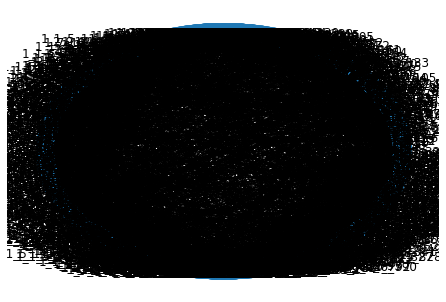

In [4]:
n=1000
m=1
qCon=0.5
qMod = 0.6
G=nx.DiGraph(nx.scale_free_graph(2))
G=gf.dmc_single_lineage(G,n,qCon,qMod)
G1,G2=gf.network_birth(G,m,m,qCon,qMod,iteration = n)
G=gf.label_conserver(G)
G1=gf.label_conserver(G1)
G2=gf.label_conserver(G2)
#print(len(list(G1.nodes)),len(list(G2.nodes)))
#nx.draw_circular(G,with_labels=True)
G1_orig=copy.deepcopy(G1)
G2_orig=copy.deepcopy(G2)
G_orig=copy.deepcopy(G)
#G1_forest=gf.duplication_forest(G1,n+m)
#G2_forest=gf.duplication_forest(G2,n+m)



In [3]:
G=gf.label_conserver(G)
G1=gf.label_conserver(G1)
G2=gf.label_conserver(G2)
#print(len(list(G1.nodes)),len(list(G2.nodes)))
#nx.draw_circular(G,with_labels=True)
G1_orig=copy.deepcopy(G1)
G2_orig=copy.deepcopy(G2)
G_orig=copy.deepcopy(G)

KeyboardInterrupt: 

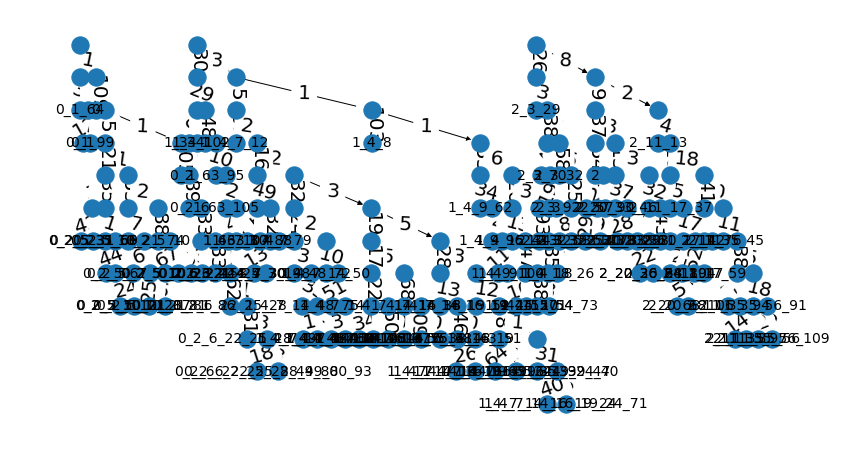

In [5]:
plt.figure(figsize=(15, 8))
pos=nx.circular_layout(G1_forest)
edge_labels = dict([((n1, n2), G1_forest[n1][n2]['weight'])
                    for n1, n2 in G1_forest.edges])

#nx.draw_circular(G1_forest,with_labels=True)
#print(nx.is_forest(G1_forest))
#gf.tree_distance_loop('0_4','0_1',G1_forest)
#gf.closest_neighbour_distance('1_4','1_1_4',G1_forest,G2_forest)
#g=Network(height=800,width=800)
#g.barnes_hut()
#g.from_nx(G1_forest)
#g.show("e.html")
labels={}
for node in G1_forest.nodes():
    if G1_forest.out_degree(node)==0:
        labels[node]=node
pos=graphviz_layout(G1_forest,prog="dot")
nx.draw_networkx_edge_labels(G1_forest, pos, edge_labels=edge_labels,font_size=20)
nx.draw(G1_forest,pos,with_labels=False)
nx.draw_networkx_labels(G1_forest,pos,labels,font_size=14)
plt.savefig("tree1.pdf")
plt.show()
#(0,0,2),(1,1,2)(0_1,0_1,2),(0_2,0,2),(2,2,2) 5-10/4=(20-10)/4=10/5 = 5/2 5/2/5=1/2=0.5

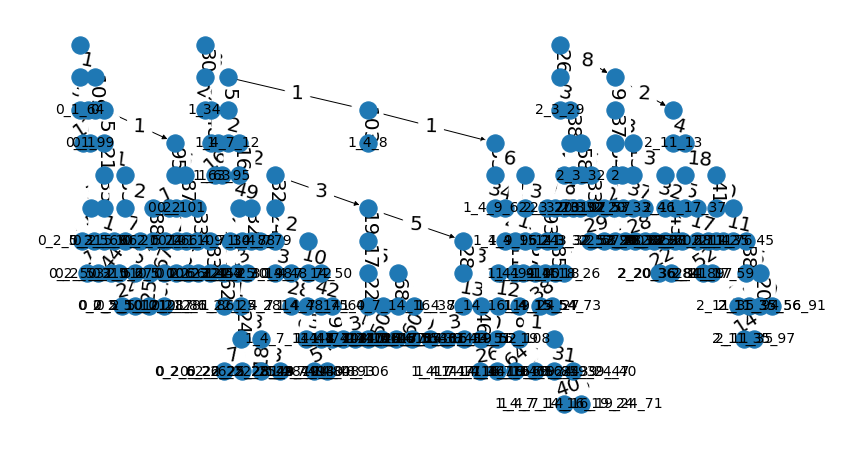

In [6]:
plt.figure(figsize=(15, 8))
pos=nx.circular_layout(G2_forest)
edge_labels = dict([((n1, n2), G2_forest[n1][n2]['weight'])
                    for n1, n2 in G2_forest.edges])

#print(nx.is_forest(G2_forest))
labels={}
for node in G2_forest.nodes():
    if G2_forest.out_degree(node)==0:
        labels[node]=node
pos=graphviz_layout(G2_forest,prog="dot")
nx.draw_networkx_edge_labels(G2_forest, pos, edge_labels=edge_labels,font_size=20)
nx.draw(G2_forest,pos,with_labels=False)
nx.draw_networkx_labels(G2_forest,pos,labels,font_size=14)
plt.savefig("tree2.pdf")
plt.show()

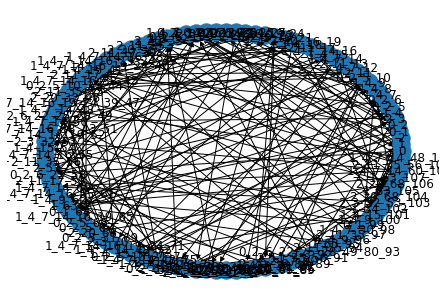

In [7]:
nx.draw_circular(G1,with_labels=True)
plt.savefig("g1original.pdf")

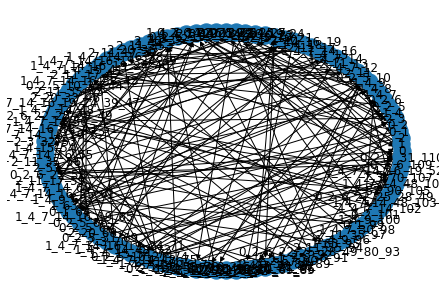

In [8]:
nx.draw_circular(G2,with_labels=True)
plt.savefig("g2original.pdf")

EC: 0.8272251308900523
ICS: 0.9693251533742331
S3: 0.8061224489795918


KeyboardInterrupt: 

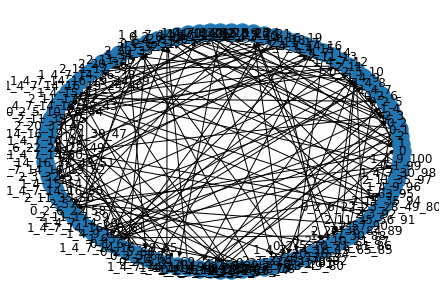

In [9]:
sourceEdges= len(list(G1.edges()))
#print(sourceEdges)
conservedEdge=0

for x in list(G1.nodes):
    for y in list(G2.nodes):
        if (x,y) in list(G1.edges) and (x,y) in list(G2.edges):
            conservedEdge=conservedEdge+1
#print(conservedEdge)
print("EC:",conservedEdge/sourceEdges)

G2_ind = nx.induced_subgraph(G2,list(G1.nodes))
nx.draw_circular(G2_ind,with_labels=True)
inducedEdges=len(list(G2_ind.edges))
print("ICS:",conservedEdge/inducedEdges)
print("S3:",conservedEdge/(sourceEdges+inducedEdges-conservedEdge))
originalNCScore=gf.original_networks_NC_score(G1,G2,G1_forest,G2_forest,n+m,m)
print("Original Modified NC SCore ",gf.original_networks_NC_score(G1,G2,G1_forest,G2_forest,n+m,m))
#print("New MEtric",2*conservedEdge/(sourceEdges+inducedEdges))

In [5]:


G=nx.convert_node_labels_to_integers(G_orig)
G1=nx.convert_node_labels_to_integers(G1_orig)
G2=nx.convert_node_labels_to_integers(G2_orig)
alignVec,mapped=gf.NF_alt(G1,G2,32,0.8)
mapping = dict(alignVec)
#print(mapped)
G1_mapped=nx.induced_subgraph(G1,list(mapped))
G1_mapped=nx.relabel_nodes(G1_mapped,mapping)

print("Alignment mapping:",alignVec)
#print(G1_mapped.edges)
#print(G2.edges)


KeyboardInterrupt: 

In [ ]:
G=nx.convert_node_labels_to_integers(G_orig)
G1=nx.convert_node_labels_to_integers(G1_orig)
G2=nx.convert_node_labels_to_integers(G2_orig)
alignVec,mapped,pairingDictParents,pairingDictChildren=gf.NF(G1,G2,32,0.8)
mapping = dict(alignVec)
#print(mapped)
G1_mapped=nx.induced_subgraph(G1,list(mapped))
G1_mapped=nx.relabel_nodes(G1_mapped,mapping)

print("Alignment mapping:",alignVec)
#print(G1_mapped.edges)
#print(G2.edges)


KeyboardInterrupt: 

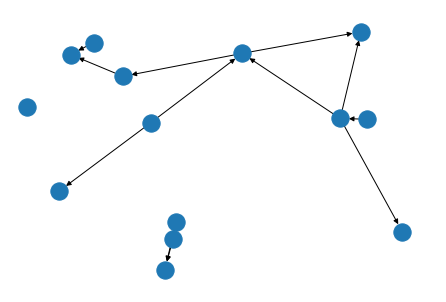

In [32]:
pos=nx.circular_layout(G2)
nx.draw(G1)
plt.savefig("Graph1unalignedmanytoone.pdf")

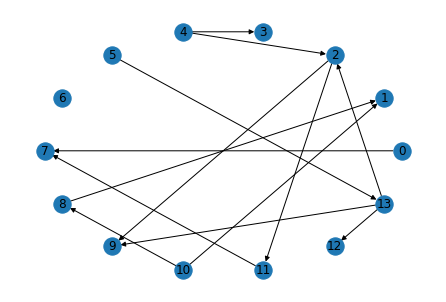

In [33]:
pos=nx.circular_layout(G2)
nx.draw(G1_mapped,with_labels=True,pos=pos)
plt.savefig("Graph1alignedmanytoone.pdf")


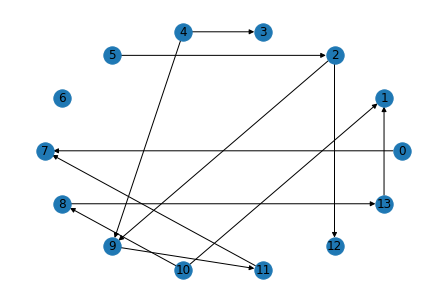

In [34]:

nx.draw(G2,with_labels=True,pos=pos)
plt.savefig("Graph2alignedmanytoone.pdf")


13
6
EC: 0.46153846153846156
ICS: 0.5
S3: 0.3157894736842105
11 1
Modified NC Score of Alignment 0.8571428571428571
Original Modified NC Score 1.0
Quality of Alignment Based off NC Score 0.8571428571428571


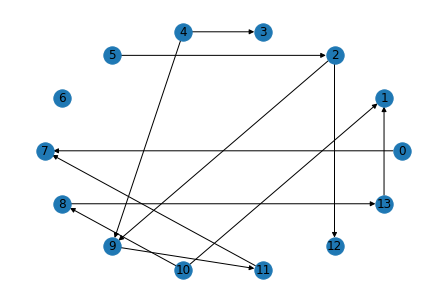

In [35]:
sourceEdges= len(list(G1_mapped.edges()))
print(sourceEdges)
conservedEdge=0
for x in range(0,max(len(list(G1_mapped.nodes)),len(list(G2.nodes)))):
    for y in range(0,max(len(list(G1_mapped.nodes)),len(list(G2.nodes)))):
        if (x,y) in list(G1_mapped.edges) and (x,y) in list(G2.edges):
            conservedEdge=conservedEdge+1
print(conservedEdge)
print("EC:",conservedEdge/sourceEdges)

G2_ind = nx.induced_subgraph(G2,list(G1_mapped.nodes))
inducedEdges=len(list(G2_ind.edges))
print("ICS:",conservedEdge/inducedEdges)
print("S3:",conservedEdge/(sourceEdges+inducedEdges-conservedEdge))
#print("New MEtric",2*conservedEdge/(sourceEdges+inducedEdges))
nx.draw(G2_ind,with_labels=True,pos=pos)
print(n+m,m)
modifiedNCScore=gf.NC_scorer(alignVec,mapped,G1,G2,G1_forest,G2_forest,DMCSteps=n+m,childDistance=m)
print("Modified NC Score of Alignment",gf.NC_scorer(alignVec,mapped,G1,G2,G1_forest,G2_forest,DMCSteps=n+m,childDistance=m))
print("Original Modified NC Score",originalNCScore)
print("Quality of Alignment Based off NC Score",1-(originalNCScore-modifiedNCScore)/originalNCScore)

[13, 1, 7, 10, 8, 2, 4, 11, 0, 3, 5, 12, 9]


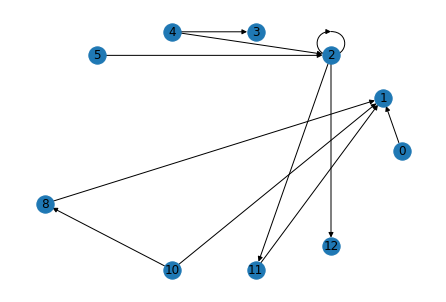

In [36]:

alignVec,mapped=gf.NF_many_to_one(G1,G,32,0.8)
print(mapped)
G1=nx.induced_subgraph(G1,list(mapped))
mapping = dict(alignVec)
G1=nx.relabel_nodes(G1,mapping)
nx.draw(G1,with_labels=True,pos=pos)

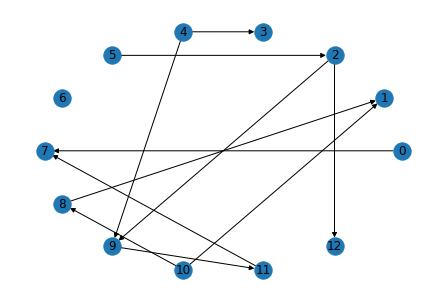

In [37]:
nx.draw(G,with_labels=True,pos=pos)

In [38]:
def node_match(a,b):
    print(a,b)
    if a==b:
        return True
    else:
        return False
gf.graph_edit_distance(G1,G2,node_match)

AttributeError: module 'gene_functions' has no attribute 'graph_edit_distance'

In [22]:
maxQuality=0
for a in range(-50,50):
    for b in np.arange(-20,20,0.2):
        G=nx.convert_node_labels_to_integers(G_orig)
        G1=nx.convert_node_labels_to_integers(G1_orig)
        G2=nx.convert_node_labels_to_integers(G2_orig)
        alignVec,mapped=gf.NF_many_to_one(G1,G2,a,b)
        mapping = dict(alignVec)

        G1_mapped=nx.induced_subgraph(G1,list(mapped))
        G1_mapped=nx.relabel_nodes(G1_mapped,mapping)
        modifiedNCScore=gf.NC_scorer(alignVec,mapped,G1,G2,G1_forest,G2_forest,DMCSteps=n+m,childDistance=m)
        quality=1-(originalNCScore-modifiedNCScore)/originalNCScore
        #print("Modified NC Score of Alignment",modifiedNCScore)
        #print("Original Modified NC Score",originalNCScore)
        #print("Quality of Alignment Based off NC Score",1-(originalNCScore-modifiedNCScore)/originalNCScore)
        #print("Alignment mapping:",alignVec)
        print(a,b,quality)
        if quality >maxQuality:
            maxQuality=quality
            maxA=a
            maxB=b
print(maxA,maxB,maxQuality)


-50 -20.0 0.19999999999999996
-50 -19.8 0.19999999999999996
-50 -19.6 0.19999999999999996
-50 -19.400000000000002 0.19999999999999996
-50 -19.200000000000003 0.19999999999999996
-50 -19.000000000000004 0.19999999999999996
-50 -18.800000000000004 0.19999999999999996
-50 -18.600000000000005 0.19999999999999996
-50 -18.400000000000006 0.19999999999999996
-50 -18.200000000000006 0.19999999999999996
-50 -18.000000000000007 0.19999999999999996
-50 -17.800000000000008 0.19999999999999996
-50 -17.60000000000001 0.19999999999999996
-50 -17.40000000000001 0.19999999999999996
-50 -17.20000000000001 0.19999999999999996
-50 -17.00000000000001 0.19999999999999996
-50 -16.80000000000001 0.19999999999999996
-50 -16.600000000000012 0.19999999999999996
-50 -16.400000000000013 0.19999999999999996
-50 -16.200000000000014 0.19999999999999996
-50 -16.000000000000014 0.19999999999999996
-50 -15.800000000000015 0.19999999999999996
-50 -15.600000000000016 0.19999999999999996
-50 -15.400000000000016 0.199999999

In [9]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import gene_functions as gf
import scipy as sp
import copy
#from pyvis.network import Network
#from IPython.display import HTML,display
#import pydot
#import graphviz
#from networkx.drawing.nx_pydot import graphviz_layout
#import NetComp as nc
n=100
m=5
qCon=0.5
qMod=0.2
G=nx.path_graph(3)
G=nx.DiGraph(G)
G.remove_edge(0,1)
G.remove_edge(2,1)
iterations=100
network_order_dmc=[]
network_order_nf=[]
S3_nf_vec=[]
S3_nf_vec_ave=[]

S3_dmc_vec=[]
S3_dmc_vec_ave=[]

network_order_dmc_vec_ave=[]
network_order_nf_vec_ave=[]
EC_nf_vec_ave=[]
ICS_nf_vec_ave=[]
    
EC_dmc_vec_ave=[]
ICS_dmc_vec_ave=[]

qMod_vec=[i for i in np.arange(0,1.001,0.01)]
G_anc=gf.dmc_single_lineage(G,n,qCon,qMod,iteration=0)
G_anc=gf.label_conserver(G_anc)
G1,G2=gf.network_birth(G_anc,m,m,qCon,qMod,iteration=n)
G1=gf.label_conserver(G1)
G2=gf.label_conserver(G2)
        

In [10]:

G_dmc_anc=gf.dmc_anc_rec(G1,G2,qMod,qCon)
for j in list(G_dmc_anc.nodes()):
    if (G_dmc_anc.out_degree(j)==0 and G_dmc_anc.in_degree(j)==0):
        G_dmc_anc.remove_node(j)
    elif G_dmc_anc.out_degree(j)==1 and G_dmc_anc.in_degree(j)==1 and (j,j) in list(G_dmc_anc.edges):
        G_dmc_anc.remove_node(j)
sourceEdges= len(list(G_dmc_anc.edges()))
targetEdges=len(list(G_anc.edges()))
conservedEdge=0
extraEdge=0
for x in list(G_anc.nodes):
    for y in list(G_anc.nodes):
        if (x,y) in list(G_dmc_anc.edges) and (x,y) in list(G_anc.edges):
            conservedEdge=conservedEdge+1
        elif (x,y) in list(G_dmc_anc.edges):
            extraEdge=extraEdge+1
if sourceEdges==0:
    EC_dmc=0
else:
    EC_dmc=0.5*(conservedEdge/sourceEdges+conservedEdge/targetEdges)

G2_ind = nx.induced_subgraph(G_anc,list(G_dmc_anc.nodes))
        
        
print(extraEdge,conservedEdge)
#overFlowEdges_dmc=(extraEdge-conservedEdge)/extraEdge
inducedEdges=len(list(G2_ind.edges))
        
if inducedEdges==0:
    ICS_dmc=0
else:
    ICS_dmc=conservedEdge/inducedEdges
if sourceEdges+inducedEdges-conservedEdge==0:
    S3_dmc=0
else:
    S3_dmc=conservedEdge/(sourceEdges+inducedEdges-conservedEdge)
        
        

0 1132


In [11]:
G1_orig=copy.deepcopy(G1)
G2_orig=copy.deepcopy(G2)

G1_labelless=nx.convert_node_labels_to_integers(G1_orig)
G2_labelless=nx.convert_node_labels_to_integers(G2_orig)
alignVec,mapped=gf.NF_alt(G1_labelless,G2_labelless,32,0.8)
mapping = dict(alignVec)

G1_mapped=nx.induced_subgraph(G1_labelless,list(mapped))
G1_mapped=nx.relabel_nodes(G1_mapped,mapping)

print("Alignment mapping:",alignVec)

G_intersect=nx.intersection(G1_mapped,G2_labelless)

for j in list(G_intersect.nodes()):
    if (G_intersect.out_degree(j)==0 and G_intersect.in_degree(j)==0):
        G_intersect.remove_node(j)
    elif G_intersect.out_degree(j)==1 and G_intersect.in_degree(j)==1 and (j,j) in list(G_intersect.edges):
        G_intersect.remove_node(j)

mapping=dict()
for i in list(G_intersect.nodes):
    mapping[i]=G_intersect.nodes[i]['orig_label']
G_nf_anc=nx.relabel_nodes(G_intersect,mapping)
        
        

sourceEdges= len(list(G_nf_anc.edges()))
targetEdges=len(list(G_anc.edges()))
conservedEdge=0
extraEdge=0
for x in list(G_anc.nodes):
    for y in list(G_anc.nodes):
        if (x,y) in list(G_nf_anc.edges) and (x,y) in list(G_anc.edges):
            conservedEdge=conservedEdge+1
        elif (x,y) in list(G_nf_anc.edges):
            extraEdge=extraEdge+1
if sourceEdges==0:
    EC_nf=0
else:
    EC_nf=0.5*(conservedEdge/sourceEdges+conservedEdge/targetEdges)
        
G2_ind = nx.induced_subgraph(G_anc,list(G_nf_anc.nodes))
        
        
#overFlowEdges_nf=(extraEdge-conservedEdge)/extraEdge
inducedEdges=len(list(G2_ind.edges))
print(extraEdge,conservedEdge)
        
if inducedEdges==0:
    ICS_nf=0
else:
    ICS_nf=conservedEdge/inducedEdges
if sourceEdges+inducedEdges-conservedEdge==0:
    S3_nf=0
else:
    S3_nf=conservedEdge/(sourceEdges+inducedEdges-conservedEdge)
    





Alignment mapping: [(62, 62), (15, 15), (97, 97), (17, 17), (48, 48), (102, 102), (33, 33), (49, 49), (40, 40), (75, 75), (90, 90), (54, 54), (66, 66), (28, 28), (65, 65), (85, 85), (101, 101), (77, 77), (58, 58), (22, 22), (82, 82), (20, 20), (36, 36), (81, 81), (32, 32), (34, 34), (5, 5), (11, 11), (72, 72), (78, 78), (37, 37), (10, 10), (106, 60), (44, 44), (100, 43), (26, 26), (68, 68), (6, 92), (45, 14), (18, 18), (43, 12), (63, 63), (1, 1), (47, 107), (12, 100), (31, 31), (93, 93), (70, 70), (73, 73), (87, 87), (51, 51), (7, 7), (89, 89), (88, 88), (46, 46), (57, 57), (30, 30), (79, 79), (13, 13), (86, 69), (55, 55), (21, 21), (4, 39), (60, 56), (91, 19), (27, 27), (50, 50), (84, 84), (71, 71), (95, 95), (96, 45), (74, 74), (3, 3), (2, 41), (59, 59), (39, 80), (99, 23), (42, 42), (41, 35), (98, 98), (19, 64), (29, 29), (80, 76), (53, 8), (23, 91), (69, 96), (94, 4), (16, 16), (103, 94), (14, 106), (105, 104), (38, 47), (8, 61), (92, 6), (67, 2), (24, 24), (76, 53), (64, 99), (52,